In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

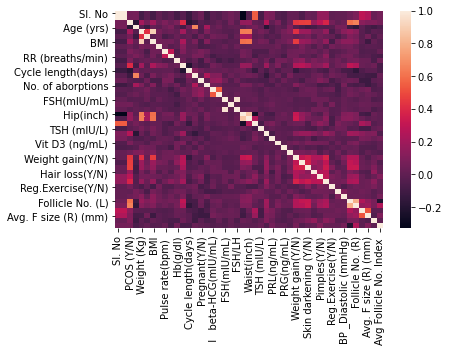

In [2]:
#Retrieve Data Set

data_full = pd.read_csv('/Users/aminasaleh/Downloads/PCOS_data_without_infertilityV2.csv')


dataFile_hm = sns.heatmap(data_full.corr(), annot = False)

In [4]:
#Clean up Data

data_full = data_full.dropna()

data_full = data_full.drop('Sl. No', axis = 1)
data_full = data_full.drop('Patient File No.', axis = 1)
data_full = data_full.drop('Follicle No. (L)', axis = 1)
data_full = data_full.drop('Follicle No. (R)', axis = 1)

x = data_full.drop(columns = ['Avg Follicle No. Index ']).copy()
y = data_full ['Avg Follicle No. Index ']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)


In [8]:
#Create Model, fit, and train

pls = PLSRegression(n_components=3) # 3 determined to yield best results

pls.fit(x_train, y_train)

y_pred_train = pls.predict(x_train)
y_pred_test = pls.predict(x_test)

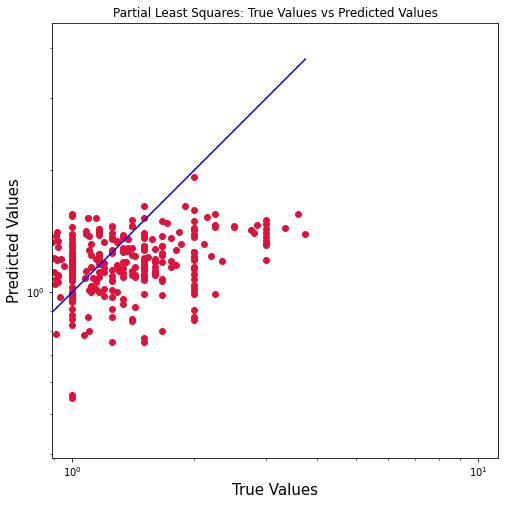

In [9]:
#Create Scatter Plot

plt.figure(figsize=(8,8))
plt.scatter(y_train, y_pred_train, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train), max(y_train))
p2 = min(min(y_pred_train), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Partial Least Squares: True Values vs Predicted Values")
plt.axis('equal')
plt.show()


In [10]:
#Calcualte RMSE and R2-Score

r2_train = r2_score(y_train, y_pred_train)
print("R^2 Training: ", r2_train)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 Testing: ", r2_test)
mse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'MSE Training: {mse_train}')
mse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'MSE Testing: {mse_test}')

R^2 Training:  0.11371252836338985
R^2 Testing:  -0.09324445568096573
MSE Training: 0.5686370643198455
MSE Testing: 0.7389753136881747
